In [1]:
!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch==2.1.0
!pip install torchvision==0.16.0
import torch
import torchvision
from torchvision import transforms

from google.colab.patches import cv2_imshow
from google.colab.patches import cv2

from PIL import Image
from os import getcwd
from os import remove

Found existing installation: torch 2.1.2
Uninstalling torch-2.1.2:
  Successfully uninstalled torch-2.1.2
Found existing installation: torchvision 0.16.0
Uninstalling torchvision-0.16.0:
  Successfully uninstalled torchvision-0.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 MB 15.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 2.1.0rc0 requires torchmetrics>=0.7.0, but you have torchmetrics 0.2.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.2
    Uninstalling torchvision-0.16.2:
      Successfully uninstalled 

/Users/rouna/anaconda3/envs/thirdlama/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [2]:
model = torch.jit.load('runs/run Oct-19-2023 23:34:07/checkpoint Oct-20-2023 00:37:55.pt')
model = torch.compile(model)
model

OptimizedModule(
  (_orig_mod): RecursiveScriptModule(
    original_name=MaskRCNN
    (transform): RecursiveScriptModule(original_name=GeneralizedRCNNTransform)
    (backbone): RecursiveScriptModule(
      original_name=BackboneWithFPN
      (body): RecursiveScriptModule(
        original_name=IntermediateLayerGetter
        (conv1): RecursiveScriptModule(original_name=Conv2d)
        (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
        (relu): RecursiveScriptModule(original_name=ReLU)
        (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
        (layer1): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(
            original_name=Bottleneck
            (conv1): RecursiveScriptModule(original_name=Conv2d)
            (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
            (conv2): RecursiveScriptModule(original_name=Conv2d)
            (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
            (co

In [3]:
model.eval()

OptimizedModule(
  (_orig_mod): RecursiveScriptModule(
    original_name=MaskRCNN
    (transform): RecursiveScriptModule(original_name=GeneralizedRCNNTransform)
    (backbone): RecursiveScriptModule(
      original_name=BackboneWithFPN
      (body): RecursiveScriptModule(
        original_name=IntermediateLayerGetter
        (conv1): RecursiveScriptModule(original_name=Conv2d)
        (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
        (relu): RecursiveScriptModule(original_name=ReLU)
        (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
        (layer1): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(
            original_name=Bottleneck
            (conv1): RecursiveScriptModule(original_name=Conv2d)
            (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
            (conv2): RecursiveScriptModule(original_name=Conv2d)
            (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
            (co

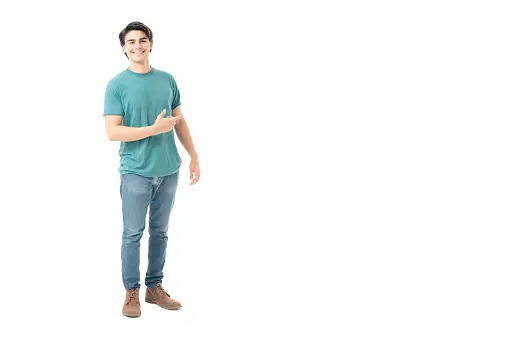

In [10]:
img = Image.open("human.png")
img = img.convert("RGB")
img

In [11]:
transform = transforms.ToTensor()
ig = transform(img)

In [12]:
with torch.no_grad():
  pred = model([ig])

code/__torch__/torchvision/models/detection/mask_rcnn.py:103: UserWarning: RCNN always returns a (Losses, Detections) tuple in scripting


In [13]:
pred

({},
 [{'boxes': tensor([[ 99.9134,  16.6763, 204.6284, 327.4772]]),
   'labels': tensor([1]),
   'scores': tensor([0.8335]),
   'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             ...,
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.]]]])}])

In [14]:
masks = pred[1][0]['masks']

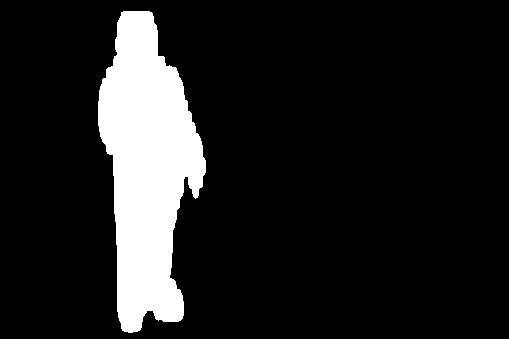

In [15]:
dog_mask = masks[0, 0] > 0.01
dog_mask = dog_mask.numpy().astype('uint8') * 255
cv2_imshow(dog_mask)

In [16]:
remove(path='LaMa_test_images/image_mask000.png')

FileNotFoundError: [Errno 2] No such file or directory: 'LaMa_test_images/image_mask000.png'

In [17]:
cv2.imwrite(filename= getcwd() + '/LaMa_test_images/image_mask000.png', img=dog_mask)

True

In [38]:
img = cv2.imread(filename='human.png')
remove(path='LaMa_test_images/image.png')

FileNotFoundError: [Errno 2] No such file or directory: 'LaMa_test_images/image.png'

In [39]:
cv2.imwrite(filename=getcwd() + '/LaMa_test_images/image.png', img=img)

True

In [40]:
try:
  remove(path='output/image_mask000.png')
except:
  pass
!python3 bin/predict.py model.path=$(pwd)/LaMa_models/lama-places/lama-fourier indir=$(pwd)/LaMa_test_images/ outdir=$(pwd)/output/

/Users/rouna/anaconda3/envs/thirdlama/lib/python3.9/site-packages/lightning_fabric/__init__.py:39: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning_fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
/Users/rouna/anaconda3/envs/thirdlama/lib/python3.9/site-packages/pytorch_lightning/__init__.py:36: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('pytorch_lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
[2024-09-15 22:46:49,076][saicinpainting.utils][WARNING] - Setting signal 

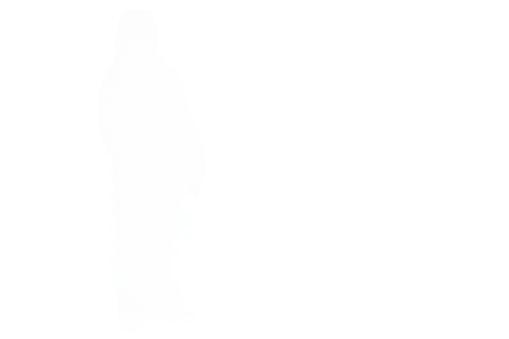

In [29]:
inpainted_image = cv2.imread('output/image_mask000.png')
cv2_imshow(inpainted_image)